### Install Dependencies

In [1]:
#%pip install pandas
#%pip install matplotlib
#%pip install python-dotenv
#%pip install coinbase-advanced-py

### Import dependencies

In [9]:
import os
import pandas as pd  
import matplotlib.pyplot as plt
from coinbase.rest import RESTClient
from dotenv import load_dotenv
import json
import time
import matplotlib.pyplot as plt

client = RESTClient() # Uses environment variables for API key and secretimport os

In [10]:
load_dotenv()

api_secret = os.getenv('CB_PRIVATE_KEY')
api_key = os.getenv('CB_KEY_NAME')

client = RESTClient(api_key=api_key, api_secret=api_secret) # Uses environment variables for API key and secretimport os


In [7]:
start_time = int(time.time()) - 2
start_time

1736389684

In [16]:
total_trades = []
start_time = int(time.time()) - 20
limit = 3
interval = 15

for i in range(limit):
    end_time = start_time + 20
    trades = client.get_market_trades('ETH-USD', 1, start_time, end_time)
    print(trades)
    try:
        total_trades.append(trades['trades'][0])
    except IndexError as e:
        print('Index error, adding response right to list')
        total_trades.append(trades)
    
    start_time -= interval
    if(i % 100 == 0):
        print(f'Completed {i+1}/{limit} queries')
    time.sleep(0.025)

{'trades': [], 'best_bid': '3327.13', 'best_ask': '3327.45'}
Index error, adding response right to list
Completed 1/3 queries
{'trades': [{'trade_id': '592162954', 'product_id': 'ETH-USD', 'price': '3327.47', 'size': '0.001', 'time': '2025-01-09T02:32:13.694252Z', 'side': 'BUY', 'exchange': '', 'bid': '', 'ask': ''}, {'trade_id': '592162951', 'product_id': 'ETH-USD', 'price': '3327.57', 'size': '0.00007512', 'time': '2025-01-09T02:32:13.680559Z', 'side': 'BUY', 'exchange': '', 'bid': '', 'ask': ''}, {'trade_id': '592162952', 'product_id': 'ETH-USD', 'price': '3327.57', 'size': '0.00020414', 'time': '2025-01-09T02:32:13.680559Z', 'side': 'BUY', 'exchange': '', 'bid': '', 'ask': ''}, {'trade_id': '592162953', 'product_id': 'ETH-USD', 'price': '3327.57', 'size': '1.548', 'time': '2025-01-09T02:32:13.680559Z', 'side': 'BUY', 'exchange': '', 'bid': '', 'ask': ''}, {'trade_id': '592162950', 'product_id': 'ETH-USD', 'price': '3327.58', 'size': '0.00043693', 'time': '2025-01-09T02:32:12.344068

In [7]:
str_trades = str(total_trades)
# Replace single quotes with double quotes to make it JSON-compatible
data_string_fixed = str_trades.replace("'", '"')

# Convert the string to a proper Python list of dictionaries
data_list = json.loads(data_string_fixed)

In [8]:
df_trades = pd.DataFrame(data_list)
df_trades

,trade_id,product_id,price,size,time,side,exchange,bid,ask,trades,best_bid,best_ask
0,581175205,ETH-USD,3918.31,0.00280733,2024-12-12T04:25:39.989985Z,BUY,,,,NaN,NaN,NaN
1,581174903,ETH-USD,3922.21,0.01,2024-12-12T04:25:24.926378Z,SELL,,,,NaN,NaN,NaN
2,581174773,ETH-USD,3922.29,0.00637389,2024-12-12T04:25:09.615033Z,BUY,,,,NaN,NaN,NaN
3,581174634,ETH-USD,3922.74,0.00000001,2024-12-12T04:24:54.892312Z,BUY,,,,NaN,NaN,NaN
4,581174466,ETH-USD,3925.19,0.00190136,2024-12-12T04:24:39.989397Z,SELL,,,,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,579019187,ETH-USD,3985.27,0.00553418,2024-12-08T17:06:54.457352Z,BUY,,,,NaN,NaN,NaN
19996,579019126,ETH-USD,3985.18,0.02484575,2024-12-08T17:06:39.795021Z,SELL,,,,NaN,NaN,NaN
19997,579019054,ETH-USD,3984.53,0.00121842,2024-12-08T17:06:23.352209Z,SELL,,,,NaN,NaN,NaN
19998,579018983,ETH-USD,3985.92,0.00302275,2024-12-08T17:06:09.967741Z,SELL,,,,NaN,NaN,NaN


C:\Users\mattr\AppData\Local\Temp\ipykernel_20436\3006657511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trades['price'] = pd.to_numeric(df_trades['price'])


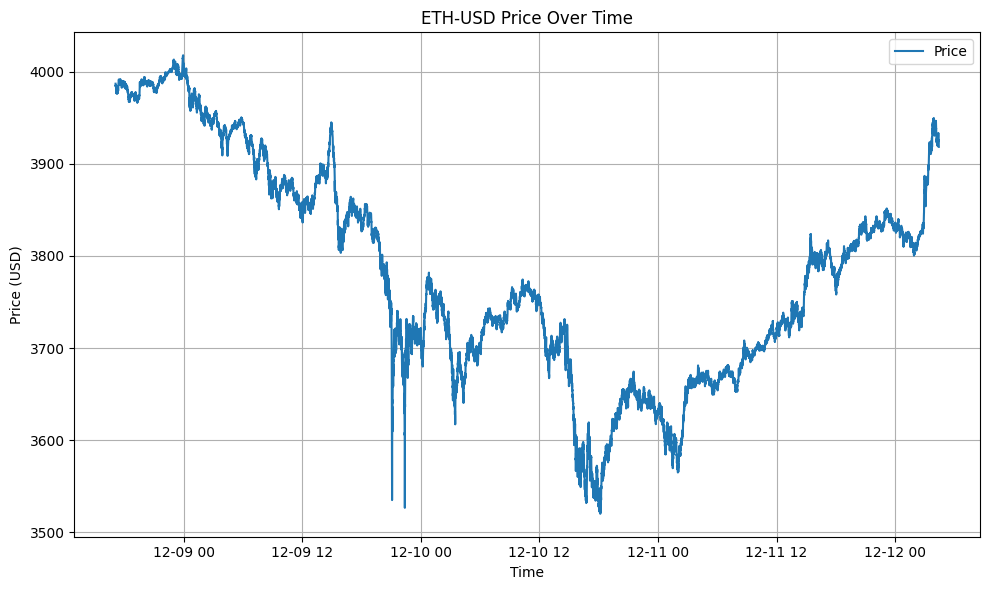

In [9]:
# Convert 'time' to datetime, coercing errors
df_trades['time'] = pd.to_datetime(df_trades['time'], errors='coerce')

# Drop rows where 'time' is NaT (invalid date)
df_trades = df_trades.dropna(subset=['time'])

# Convert 'price' column to numeric
df_trades['price'] = pd.to_numeric(df_trades['price'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_trades['time'], df_trades['price'], linestyle='-', label='Price')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('ETH-USD Price Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
df_trades.to_csv('trades.csv')